### ODE solver
Simulating LIF Neuron excitation by solving the ODE manually.
https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

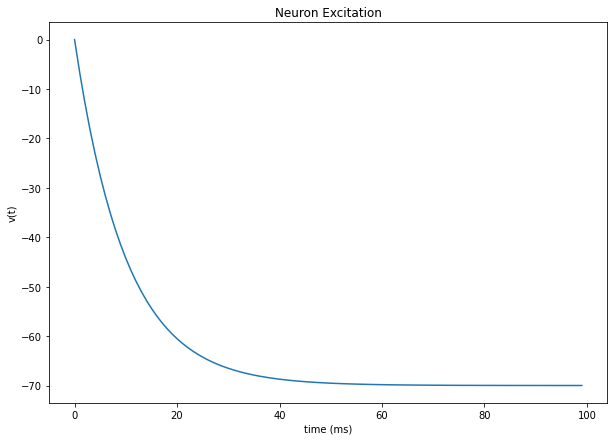

In [29]:
'''
Simulating LIF Neuron excitation by solving the ODE manually.
'''
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


dt = 1 #ms
sim_run_time = 100 #ms
stimulus_test = np.zeros((2,int(sim_run_time/dt)+2))

stimulus = stimulus_test[0]
# function that returns dv/dt
def model(v,t):
    tau = 10; El = -70
    dvdt = ((El - v) + stimulus[int(t)])/tau
    return dvdt

# initial condition
y0 = 0

# time points
t = np.array([int(tt) for tt in range(int(sim_run_time/dt))])

# solve ODE
y = odeint(model,y0,t)

# plot results
fig = plt.figure(figsize=(10,7))
plt.plot(t,y)
plt.title('Neuron Excitation')
plt.xlabel('time (ms)')
plt.ylabel('v(t)')
plt.show()

### Brian2 simulation of LIF neuron generators with injected current
The sim does not react to magnitude of injected current

In [7]:
'''
Brian2 simulation of LIF neuron generators with injected current
'''
if __name__ == '__main__':

    from brian2 import *
    
    sampling_rate = 2000 #kHz
    dt = 1/sampling_rate*1000 #ms
    sim_run_time = 100 #ms
    
    #TEST CURRENT
    input_current_test = np.ones((2,int(sim_run_time/dt)+2))
    input_current_test[:,25:75] = 100
    p.plot_EMG(input_current_test[0,:int(sim_run_time/dt)], sim_run_time/1000, 'Input TEST current during simulation')


    start_scope()
    tau = 10*ms; El = -70
    eqs = '''dv/dt = ((El - v) + stimulus(t, i))/tau : 1'''

    stimulus = TimedArray(input_current_test[:2], dt=1/sampling_rate*1000*R*ms)
    #stimulus = TimedArray(np.hstack([[c, c, c, 0, 0]
                                #  for c in np.random.rand(1000)]),
                                    #dt=10*ms)
    G = NeuronGroup(2, eqs,
                    threshold='v>1', reset='v=0', method='euler')
    G.v = 0  # different initial values for the neurons

    '''
    Why is the stimulus not exerting an influence?
    - try sub-sample: did not do anything
    '''

    statemon_test2 = StateMonitor(G, 'v', record=True) #only record Neuron 0 (RAM savings)
    spikemon_test2 = SpikeMonitor(G)

    run(100*ms)

    # %%
    '''
    Plot brian2 sim for two different runs
    '''
    fig = plt.figure(figsize=(10,7))
    plt.title('Neuron Excitation')
    plot(statemon_test1.t/ms, statemon.v[1], color='blue')
    plot(statemon_test2.t/ms, statemon.v[1], color='red', linestyle='--')
    for t in spikemon.t:
        axvline(t/ms, ls='--', c='C1', lw=3)
    xlabel('Time (ms)')
    ylabel('v');


NameError: name 'p' is not defined